In [25]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [31]:
data=pd.read_csv("file:///F:/drug-use-by-age.csv")
data.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [32]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [33]:
label_data_d_v = data.drop(['age'], axis = 1)
label_data_d = label_data_d_v.drop(['n'], axis = 1)
s = (label_data_d.dtypes == 'object')

object_cols = list(s[s].index)


data_X = label_data_d
for col in object_cols:
    data_X[col]=label_data_d[col].replace("-",0.0)

for col in object_cols:        
    data_X[col] = pd.Series(data_X[col]).astype(float)
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   alcohol-use              17 non-null     float64
 1   alcohol-frequency        17 non-null     float64
 2   marijuana-use            17 non-null     float64
 3   marijuana-frequency      17 non-null     float64
 4   cocaine-use              17 non-null     float64
 5   cocaine-frequency        17 non-null     float64
 6   crack-use                17 non-null     float64
 7   crack-frequency          17 non-null     float64
 8   heroin-use               17 non-null     float64
 9   heroin-frequency         17 non-null     float64
 10  hallucinogen-use         17 non-null     float64
 11  hallucinogen-frequency   17 non-null     float64
 12  inhalant-use             17 non-null     float64
 13  inhalant-frequency       17 non-null     float64
 14  pain-releiver-use        17 

In [38]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

%matplotlib inline

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see 

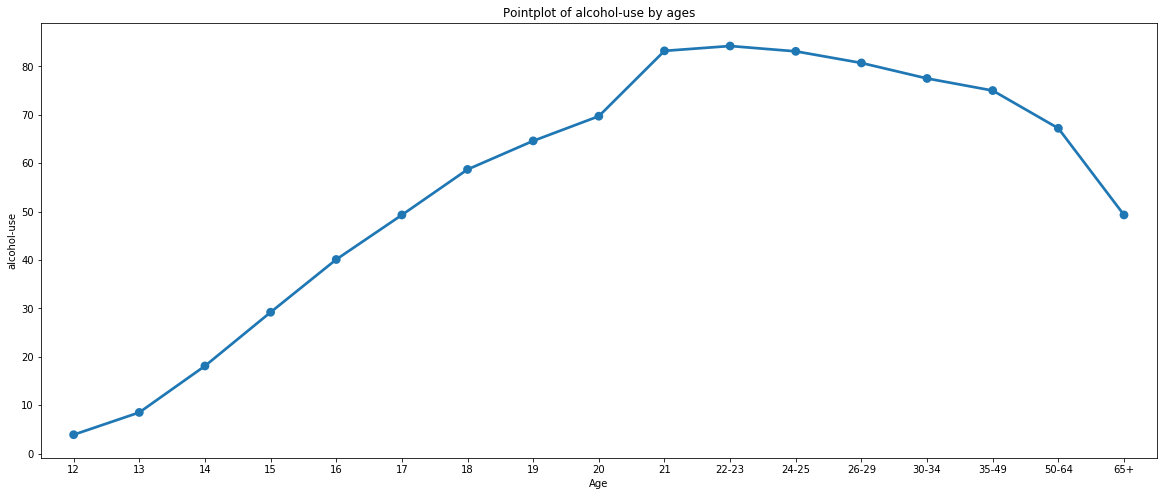

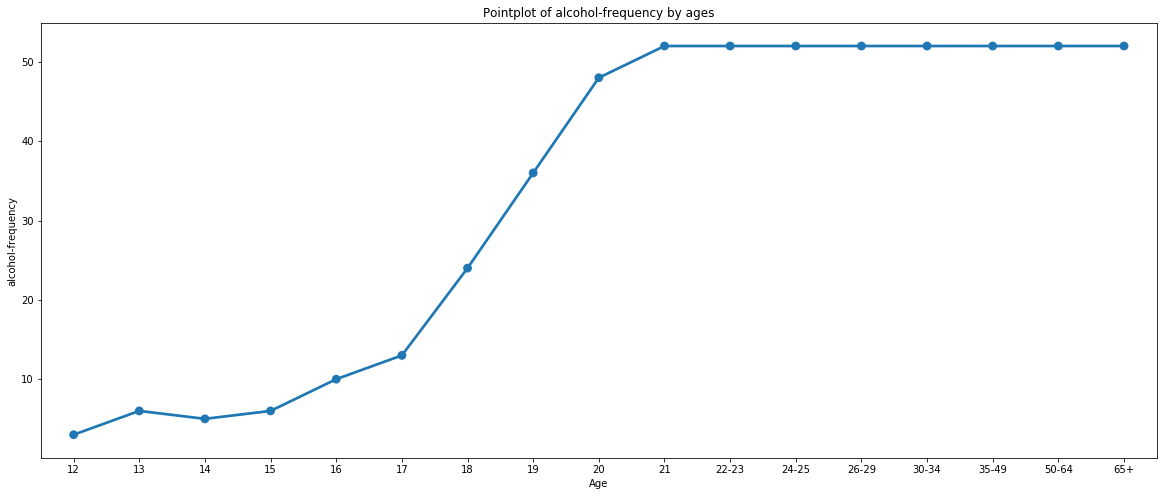

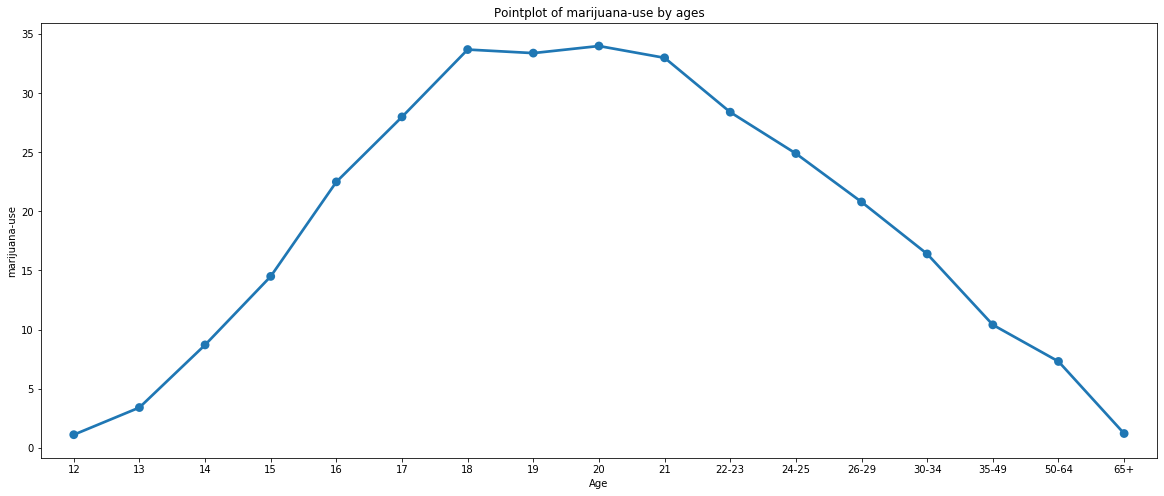

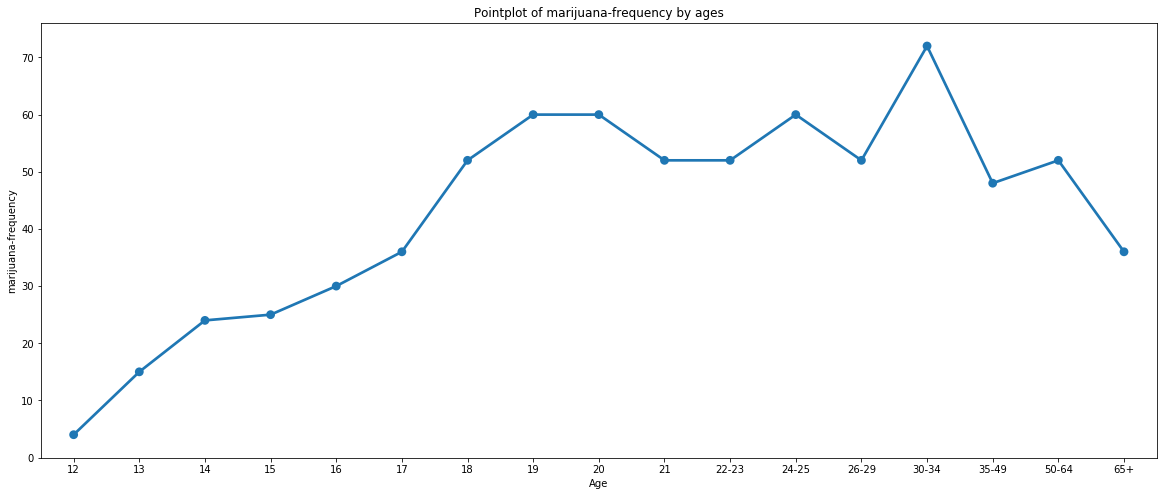

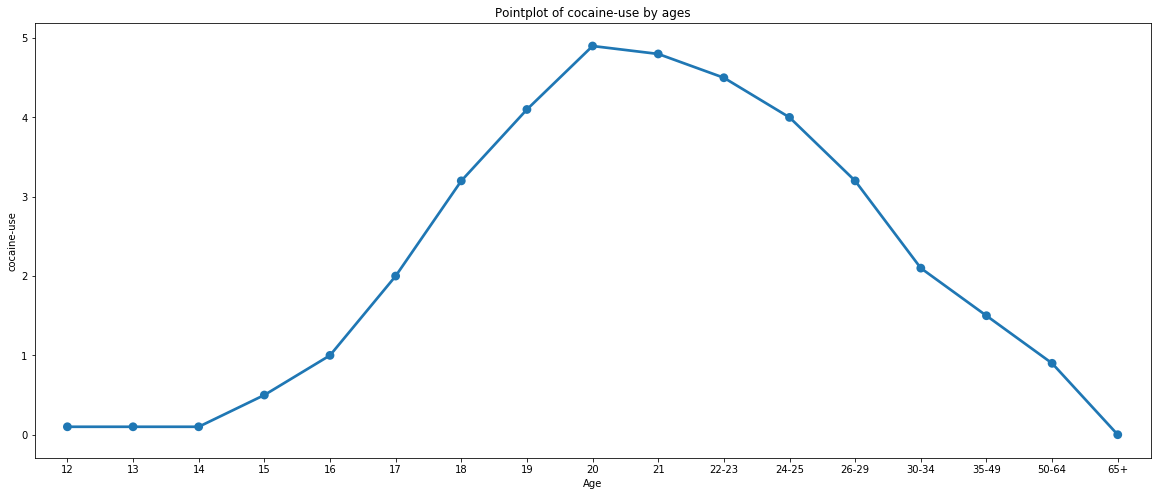

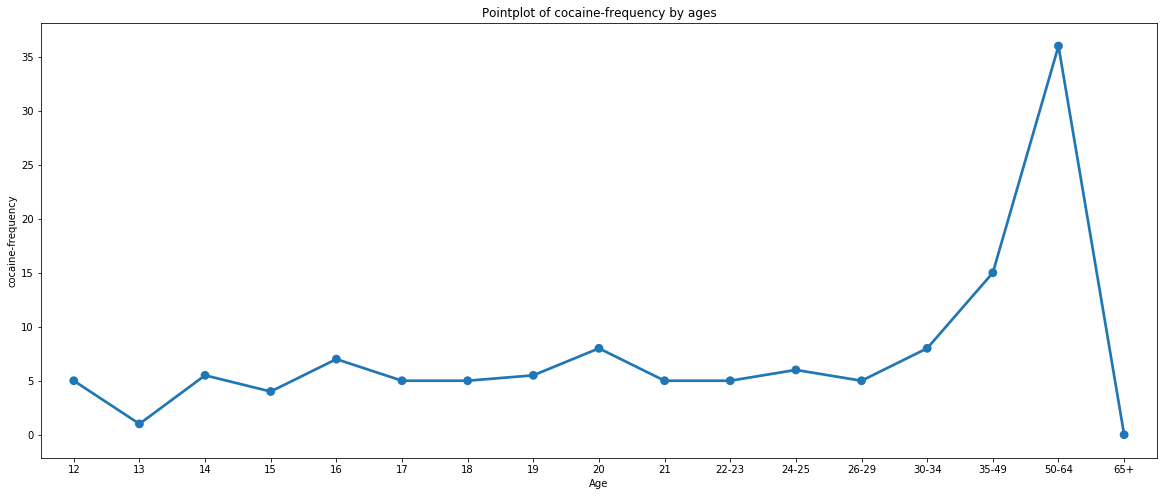

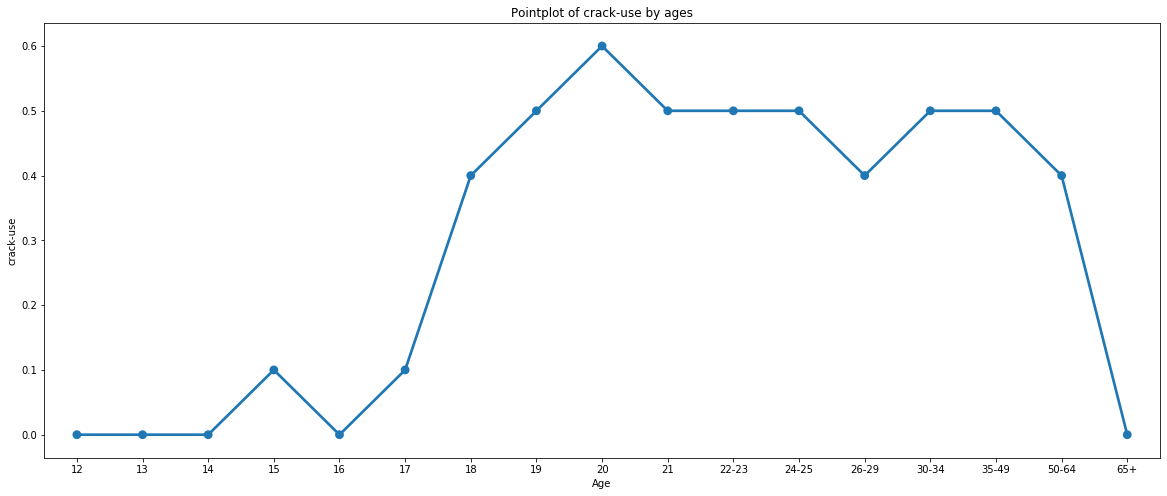

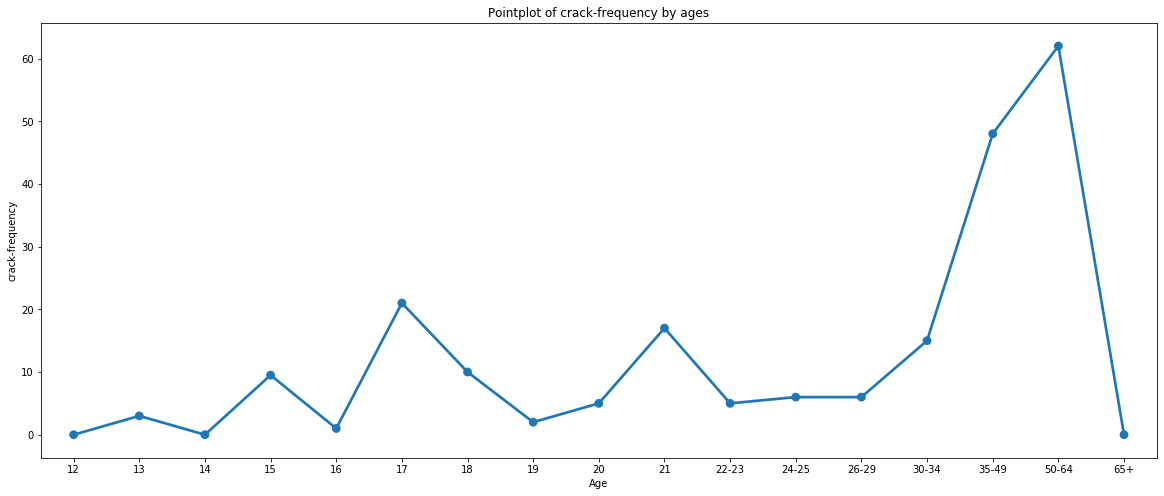

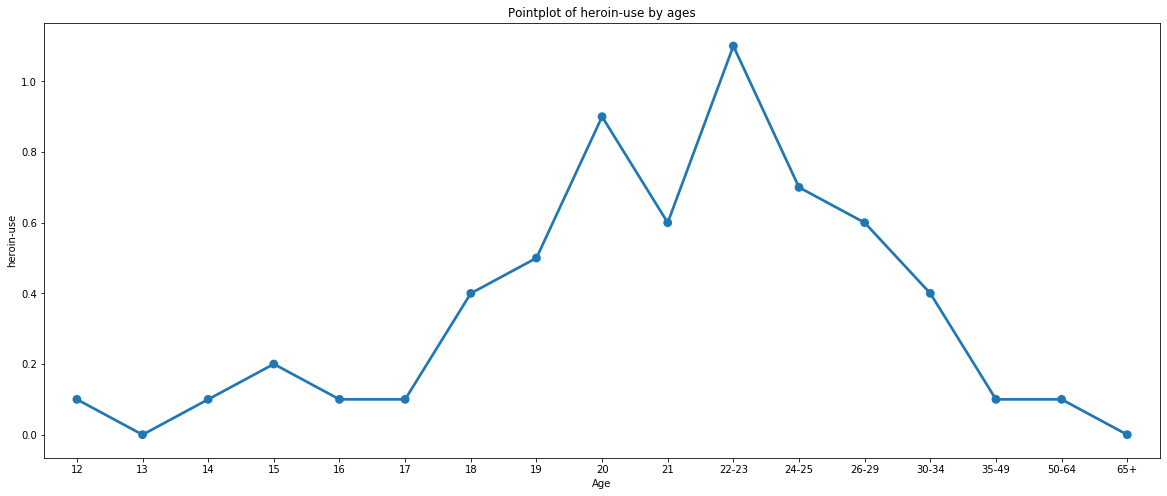

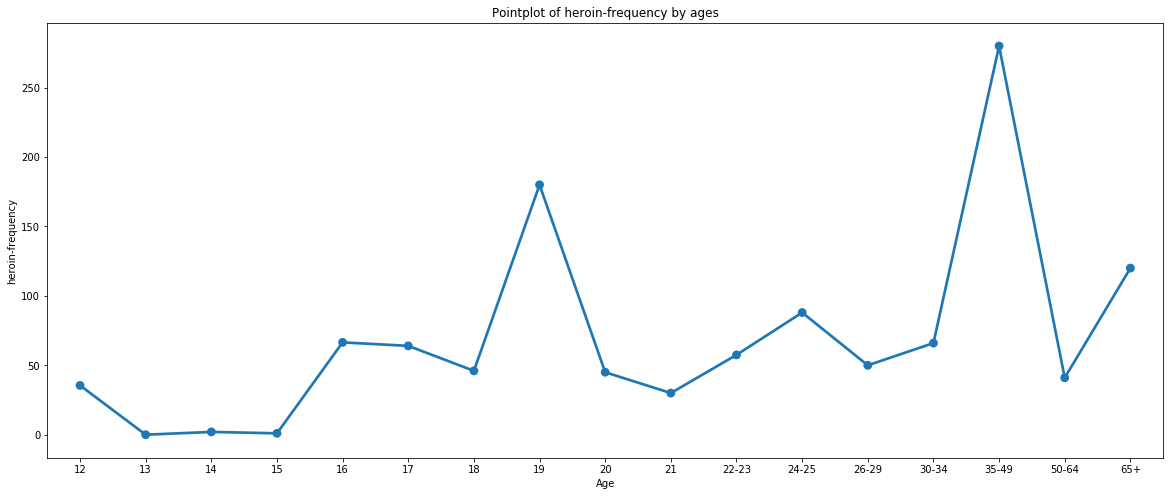

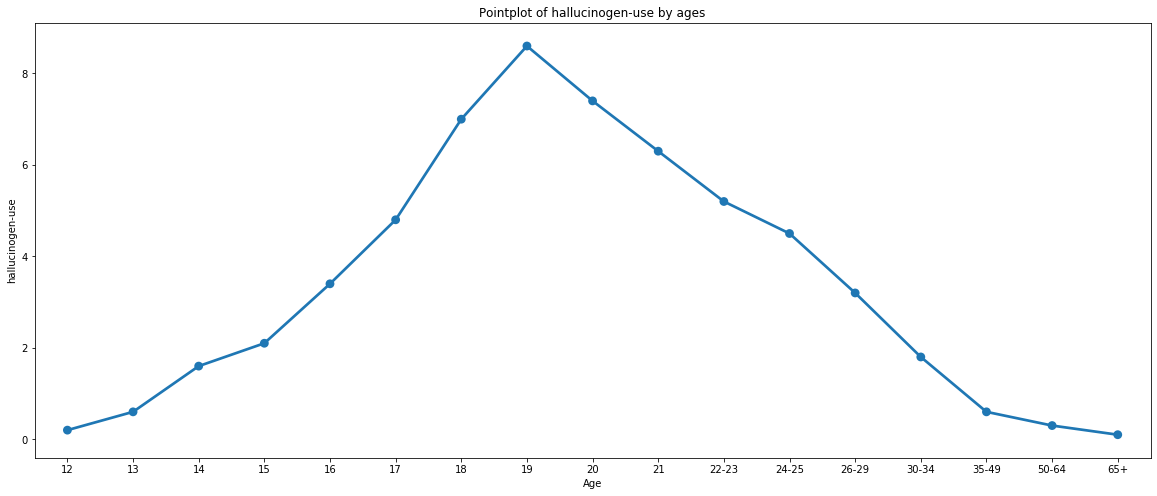

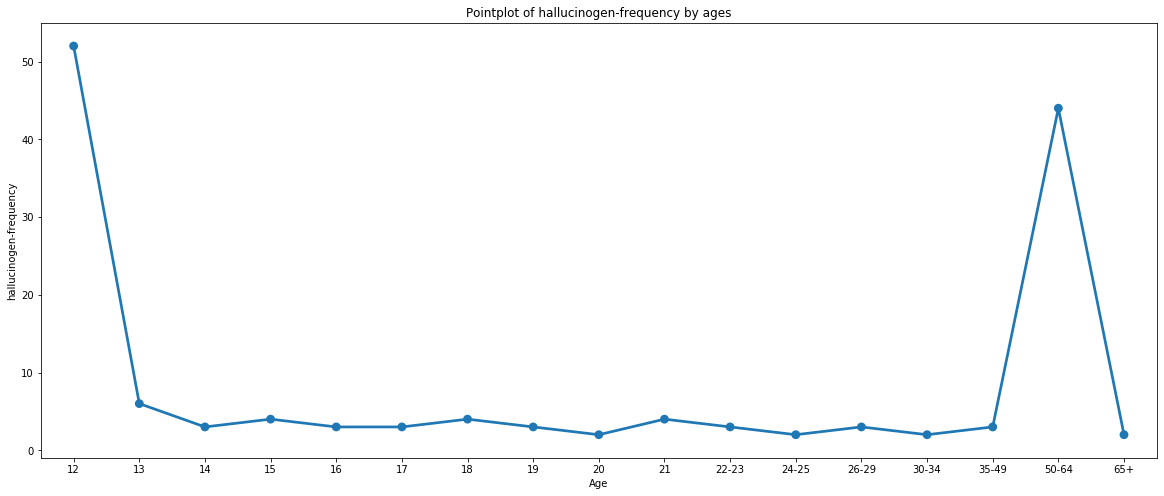

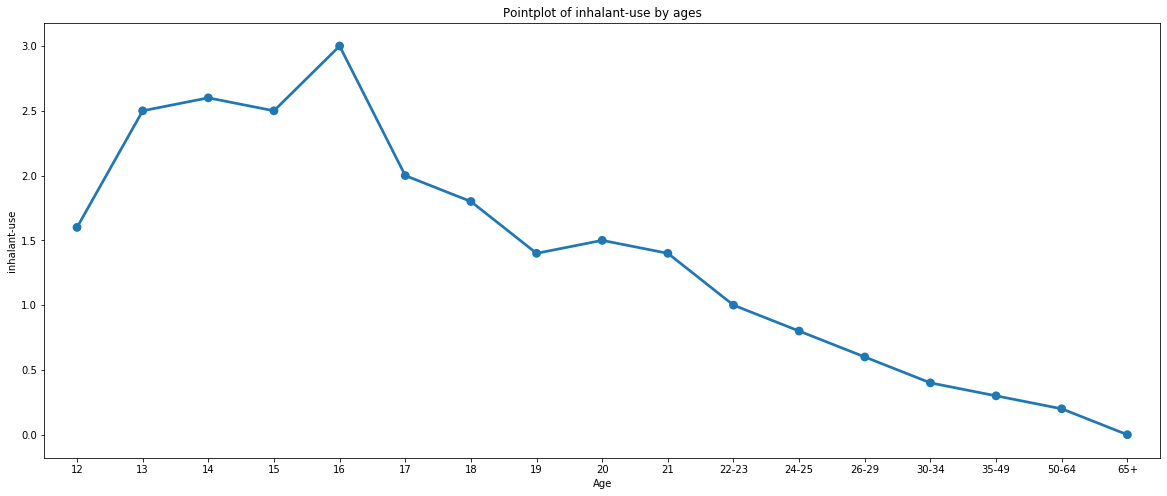

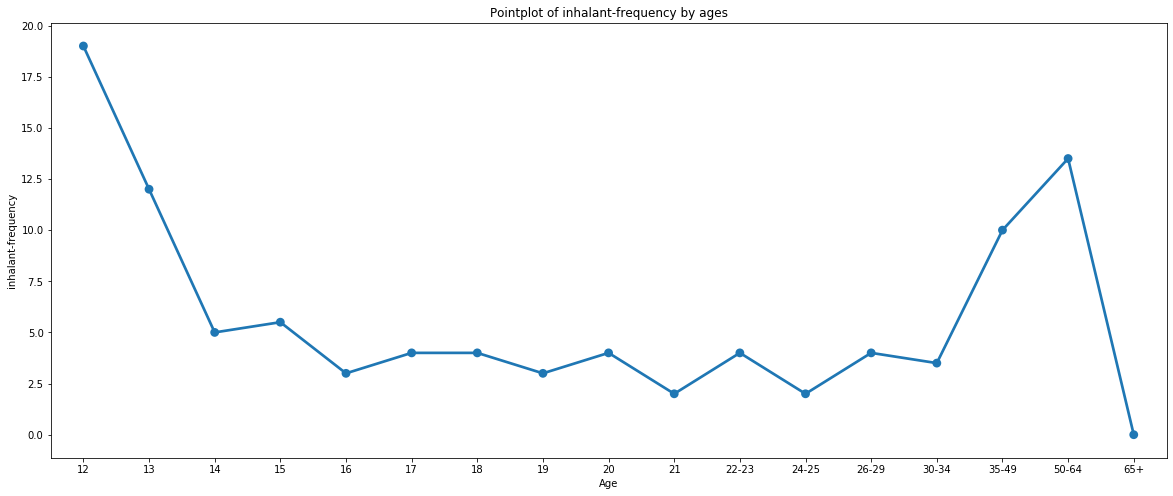

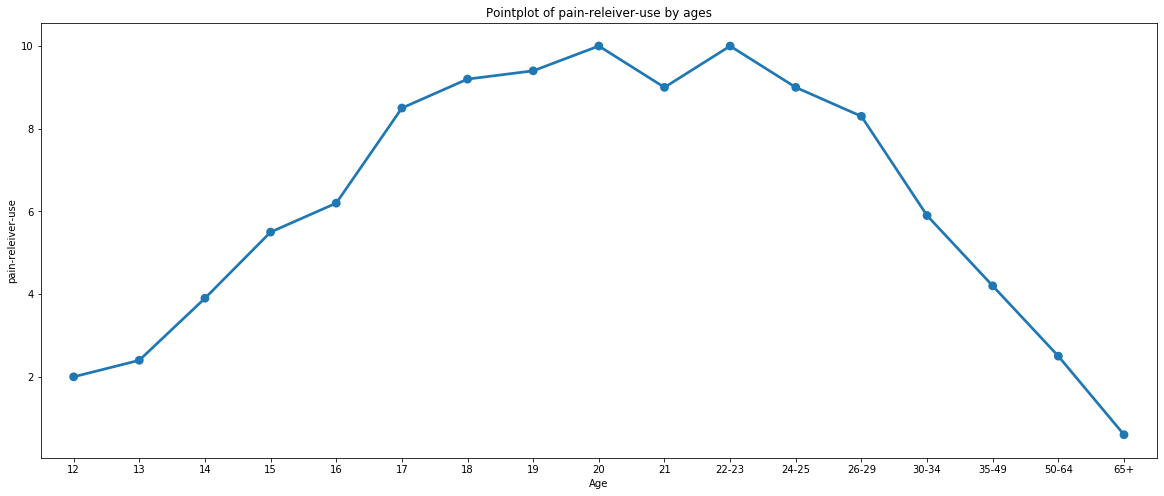

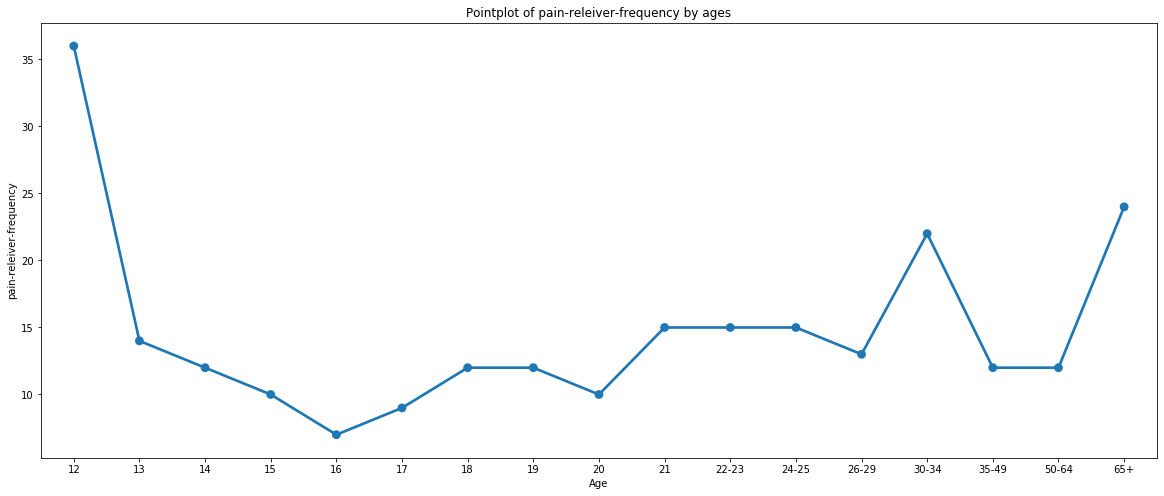

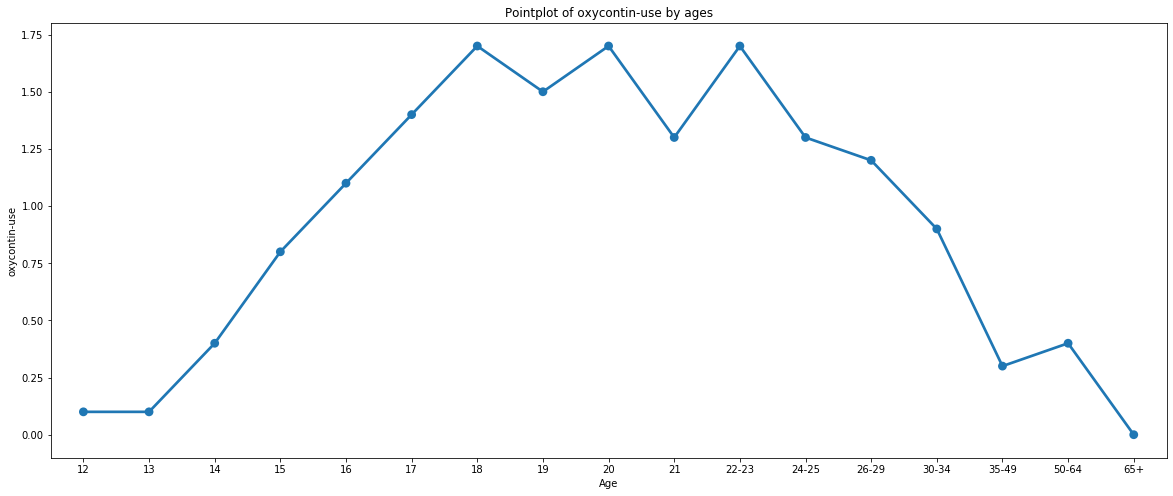

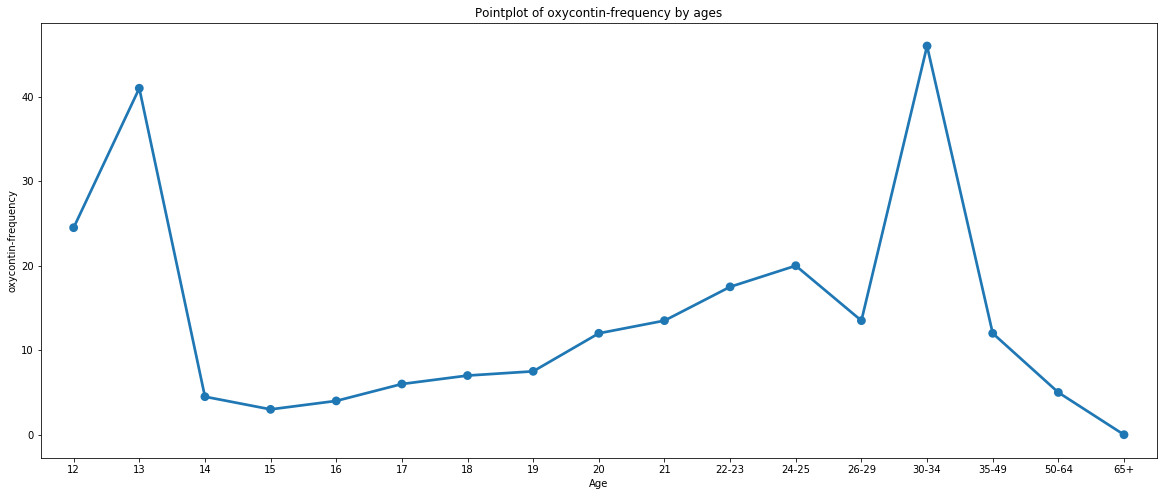

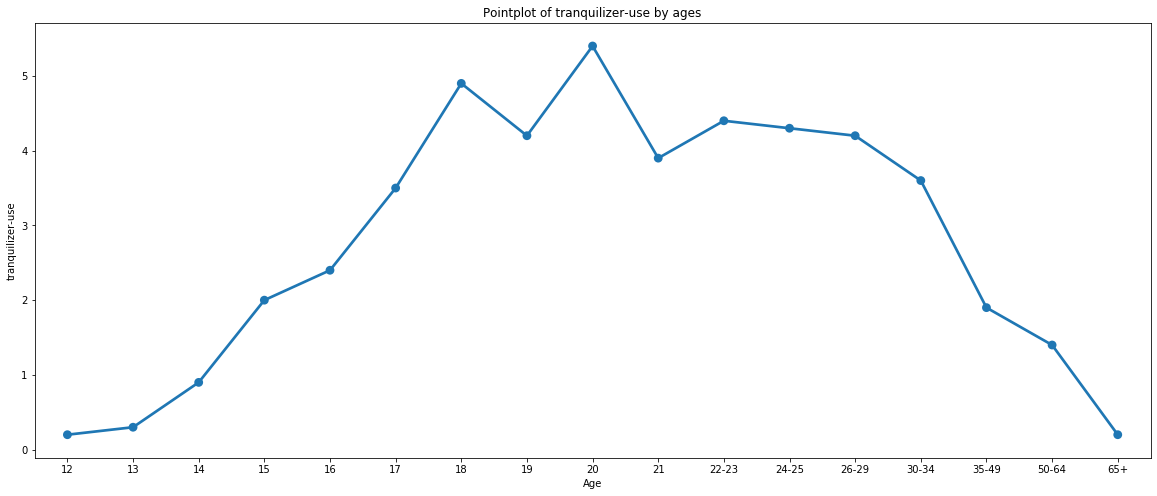

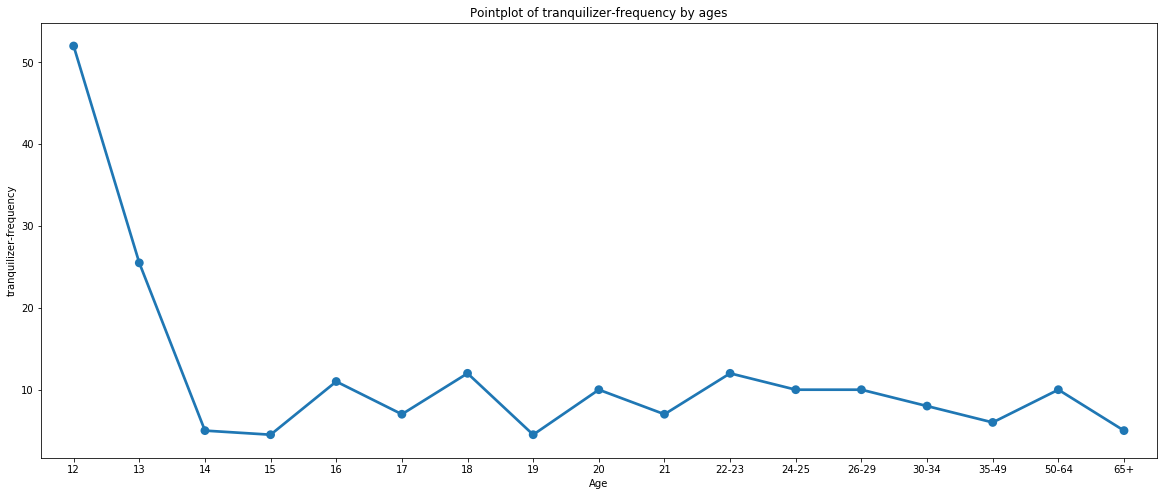

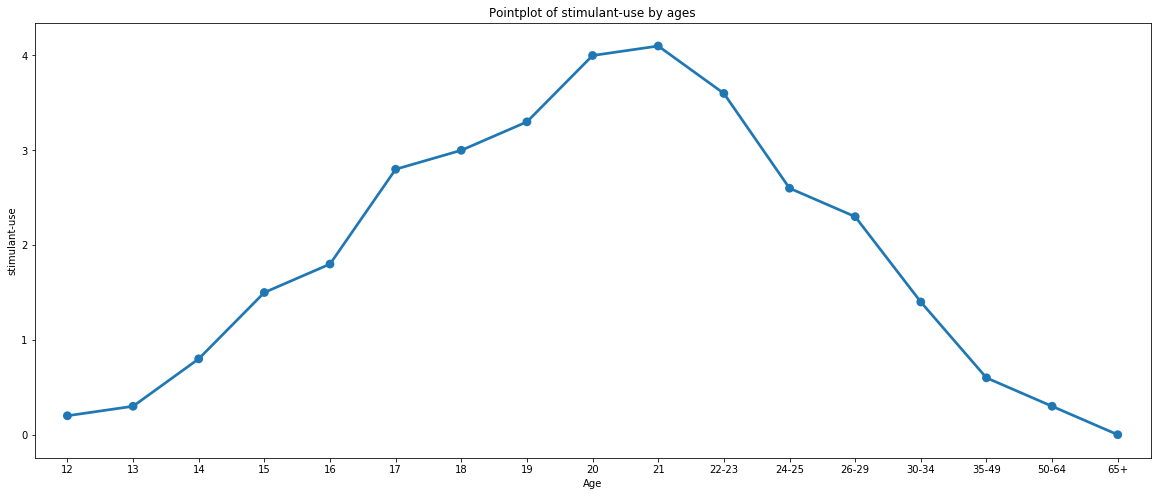

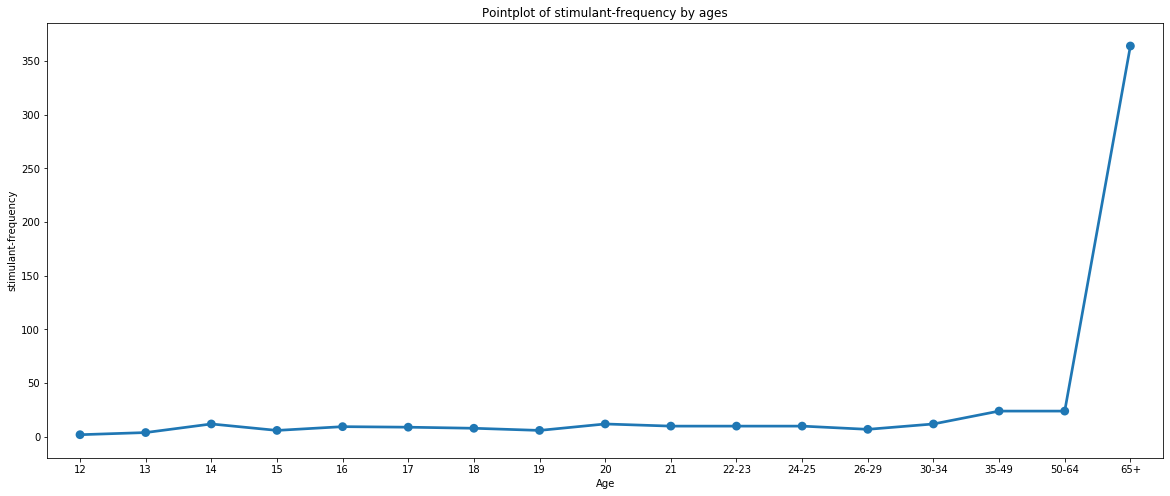

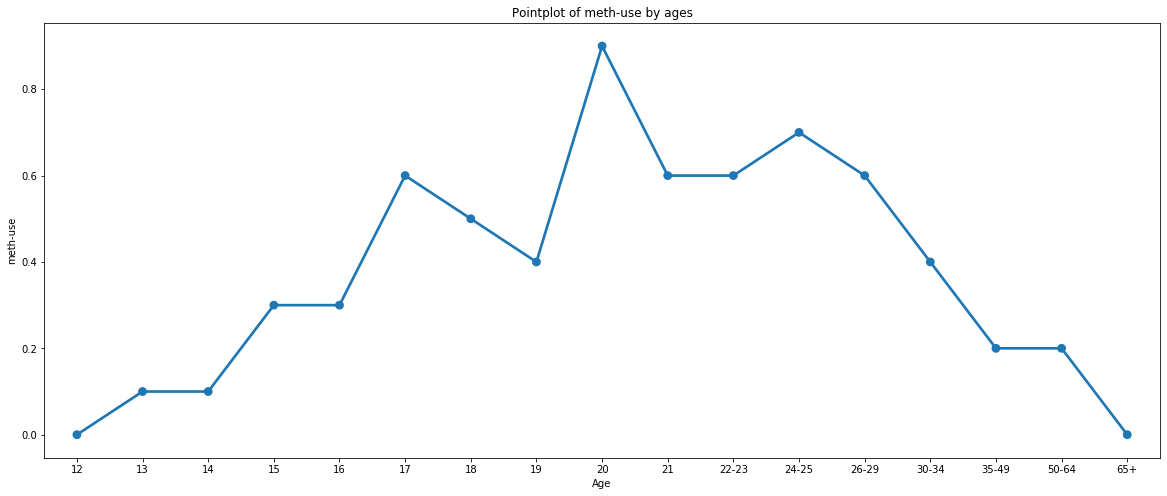

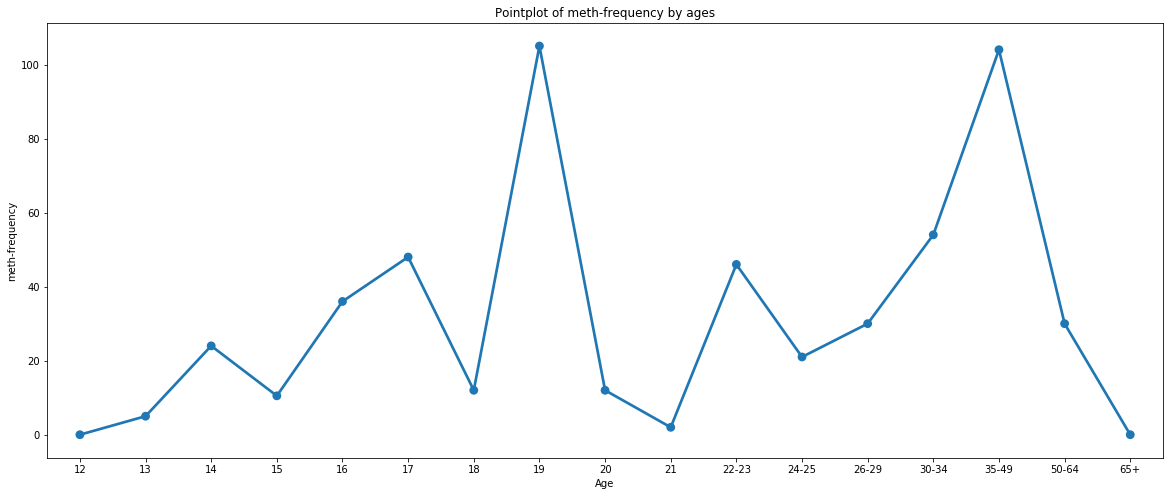

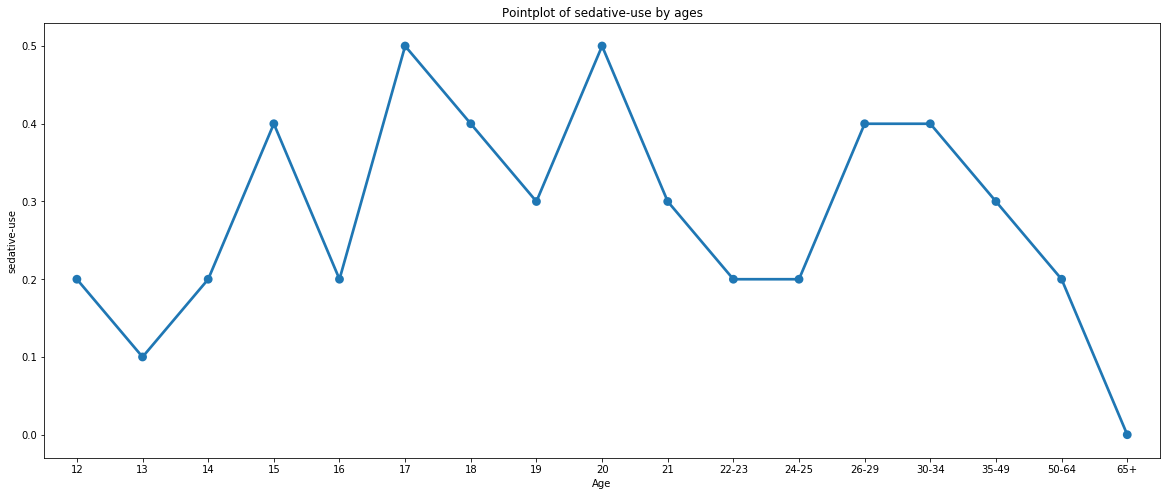

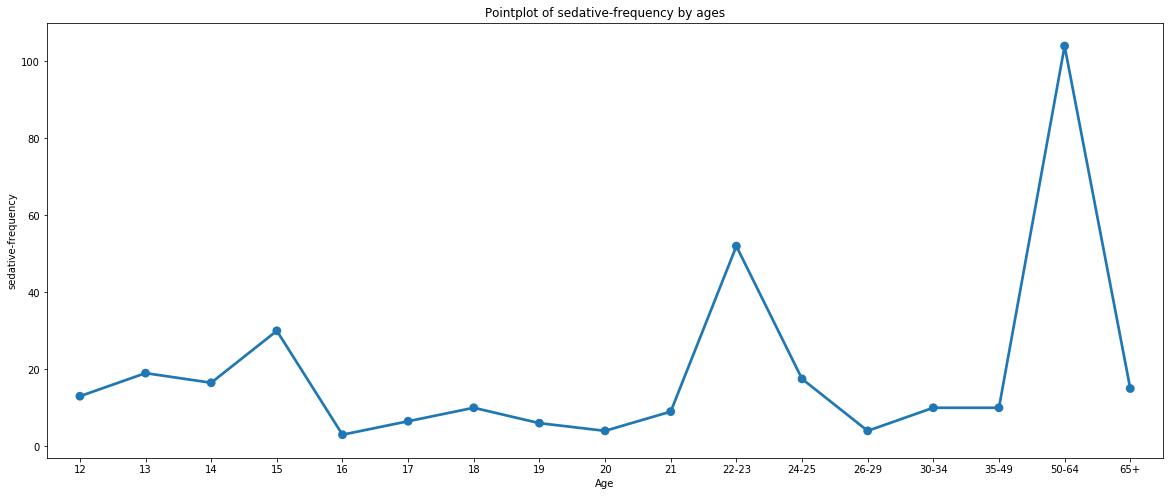

In [42]:
for i in data_X.columns:
    sns.lineplot
    plt.figure(figsize = (20,8))
    plt.title('Pointplot of {0} by ages'.format(i))
    plt.ylabel('{0}'.format(i))
    plt.xlabel('Age')
    ax = sns.pointplot(x = data["age"].to_numpy(), y = '{0}'.format(i), data = data_X)

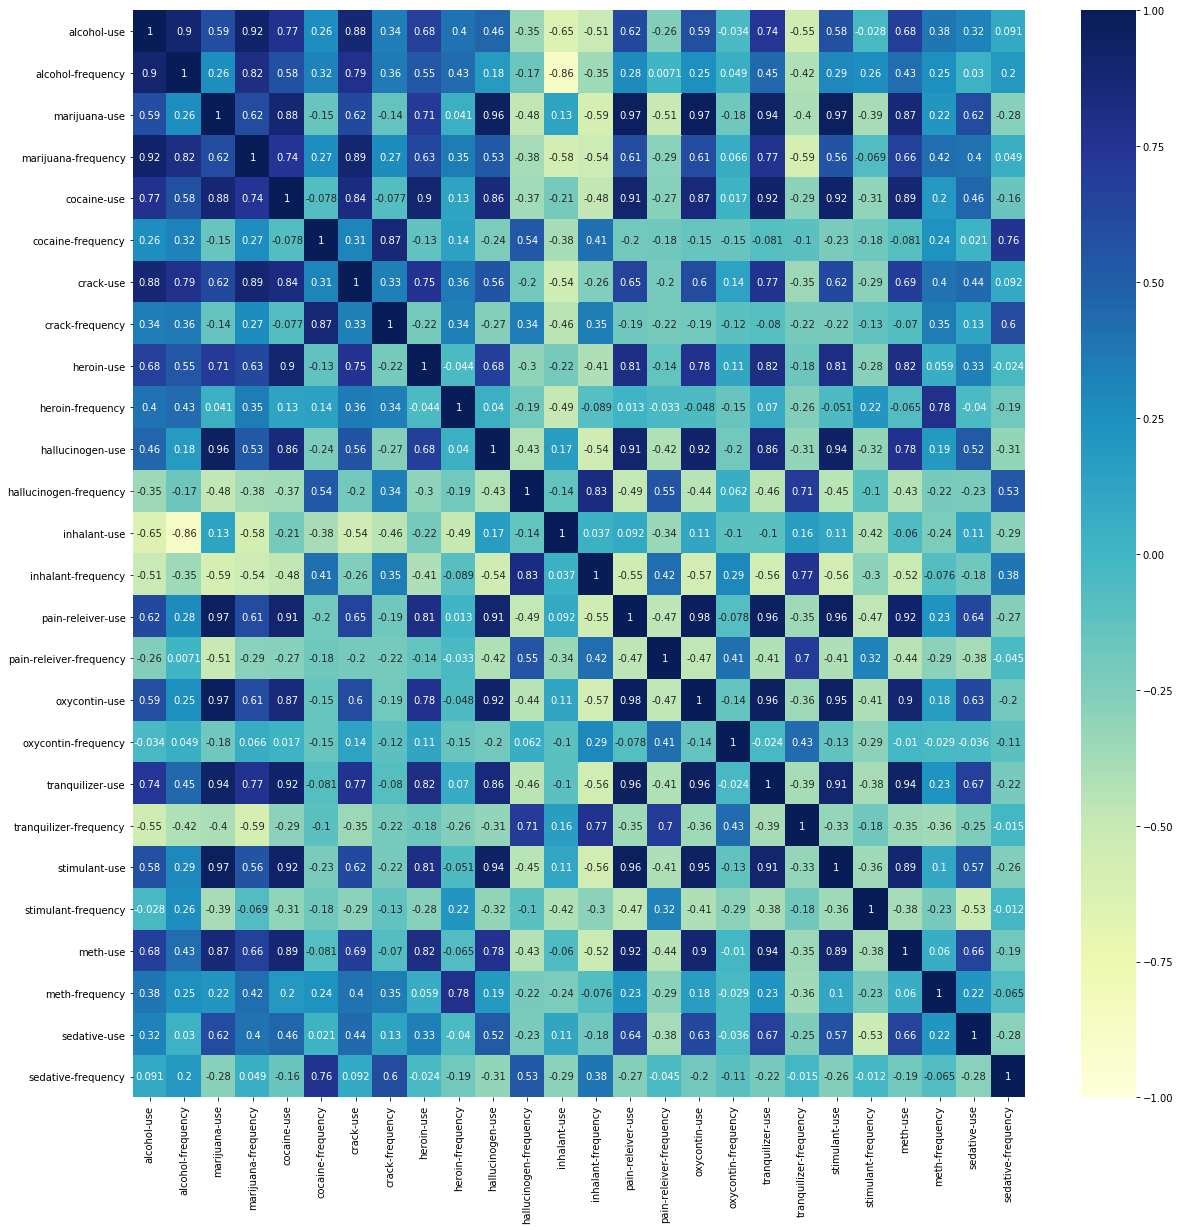

In [43]:
fig, ax = plt.subplots(figsize=(20,20))    
sns.heatmap(data_X.corr(),cmap='YlGnBu',vmin=-1, vmax=1,annot=True)

In [68]:
df = data.drop(['age','n'], axis = 1)
#label_data_d = label_data_d_v.drop(['n'], axis = 1)
for i in df:
    df[i]=df[i].replace("-",0.0)

for i in df:        
    df[i] = pd.Series(df[i]).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   alcohol-use              17 non-null     float64
 1   alcohol-frequency        17 non-null     float64
 2   marijuana-use            17 non-null     float64
 3   marijuana-frequency      17 non-null     float64
 4   cocaine-use              17 non-null     float64
 5   cocaine-frequency        17 non-null     float64
 6   crack-use                17 non-null     float64
 7   crack-frequency          17 non-null     float64
 8   heroin-use               17 non-null     float64
 9   heroin-frequency         17 non-null     float64
 10  hallucinogen-use         17 non-null     float64
 11  hallucinogen-frequency   17 non-null     float64
 12  inhalant-use             17 non-null     float64
 13  inhalant-frequency       17 non-null     float64
 14  pain-releiver-use        17 

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   alcohol-use              17 non-null     float64
 1   alcohol-frequency        17 non-null     float64
 2   marijuana-use            17 non-null     float64
 3   marijuana-frequency      17 non-null     float64
 4   cocaine-use              17 non-null     float64
 5   cocaine-frequency        17 non-null     float64
 6   crack-use                17 non-null     float64
 7   crack-frequency          17 non-null     float64
 8   heroin-use               17 non-null     float64
 9   heroin-frequency         17 non-null     float64
 10  hallucinogen-use         17 non-null     float64
 11  hallucinogen-frequency   17 non-null     float64
 12  inhalant-use             17 non-null     float64
 13  inhalant-frequency       17 non-null     float64
 14  pain-releiver-use        17 

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see 

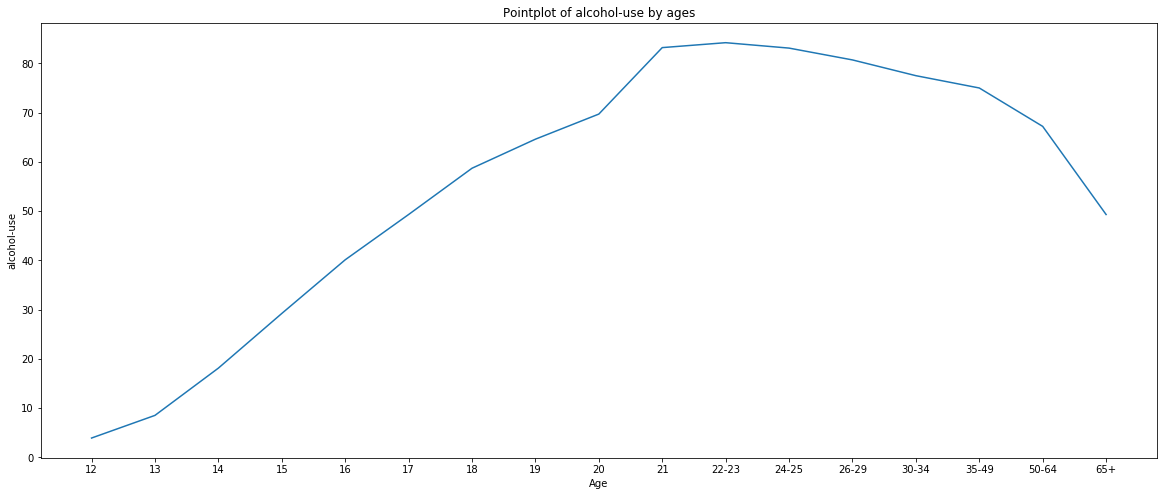

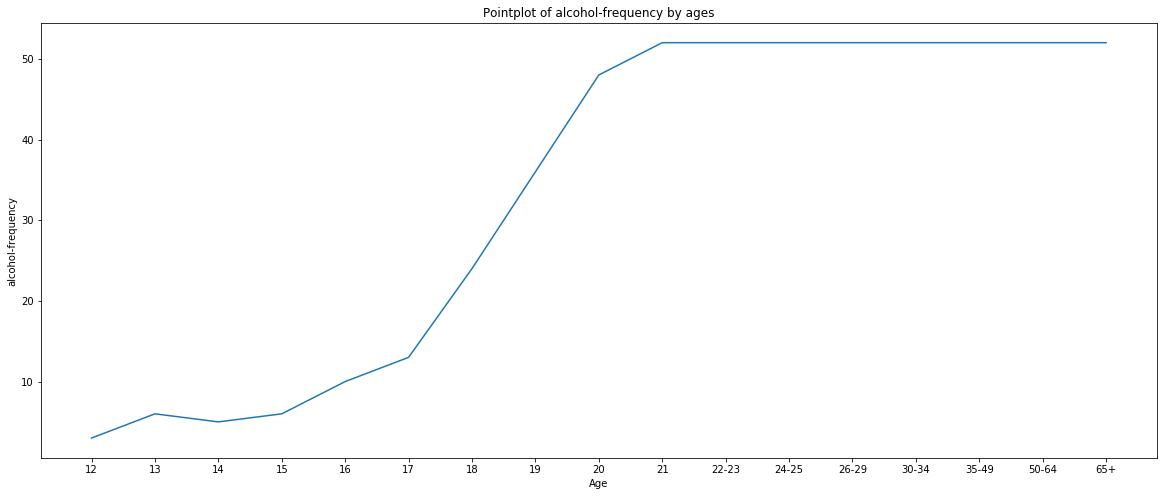

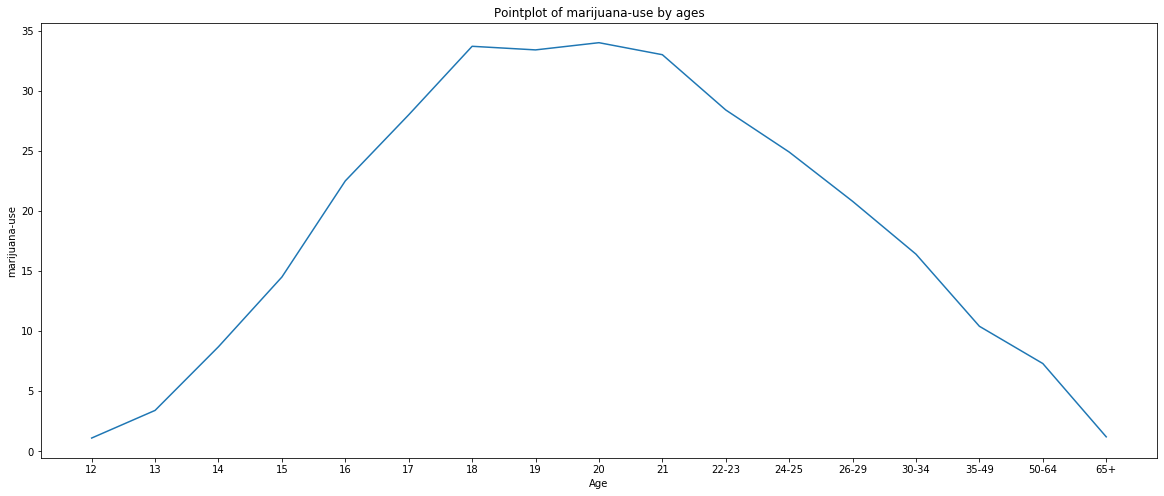

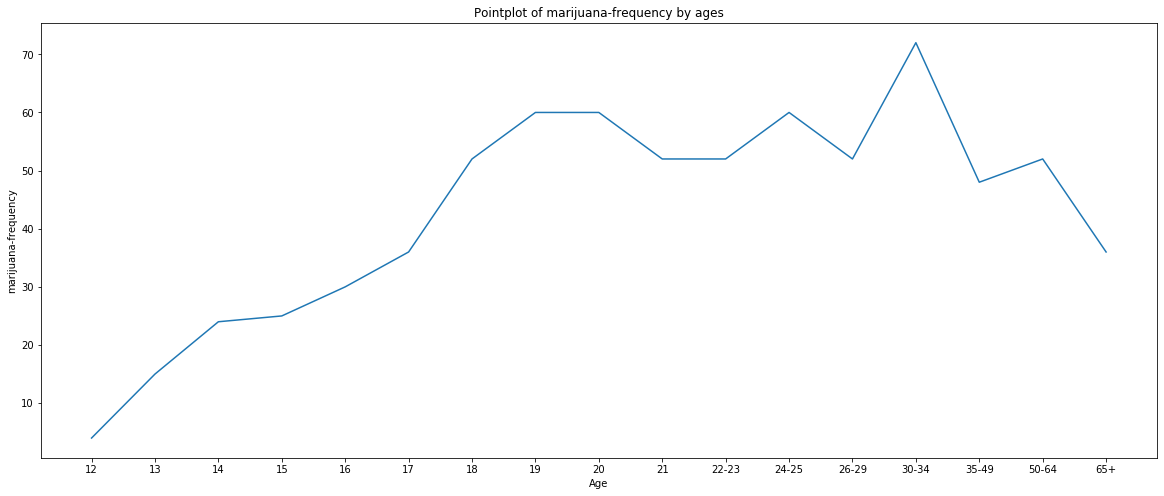

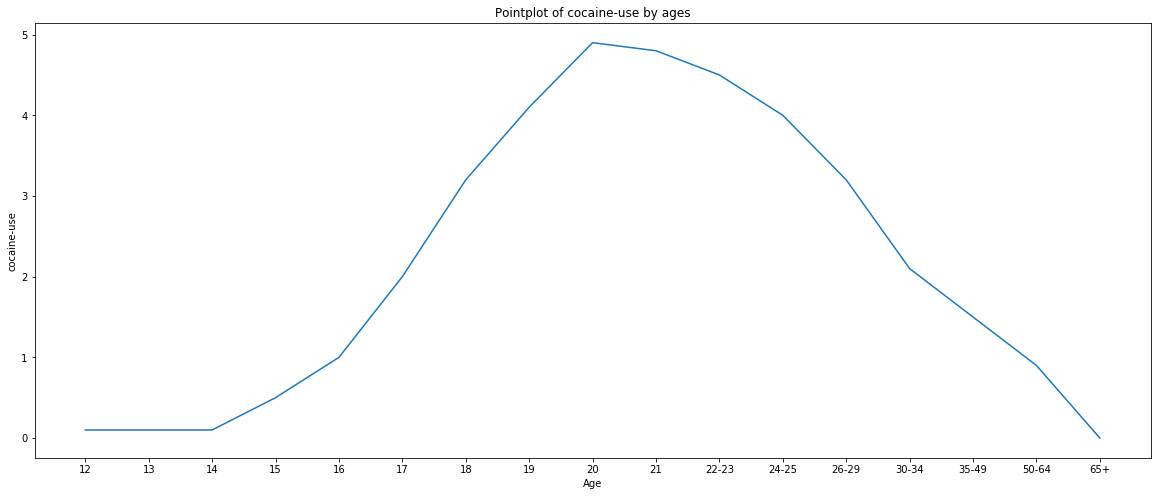

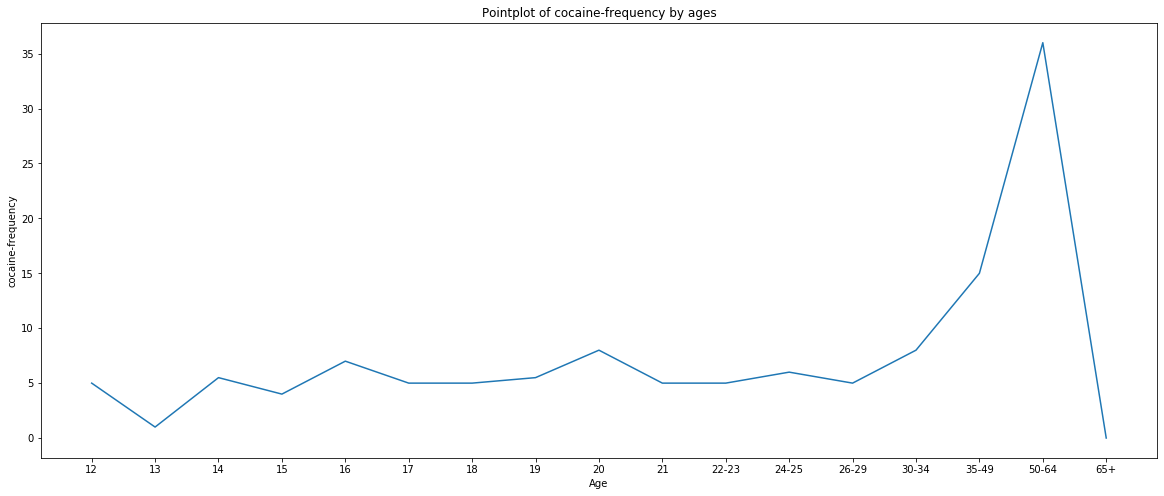

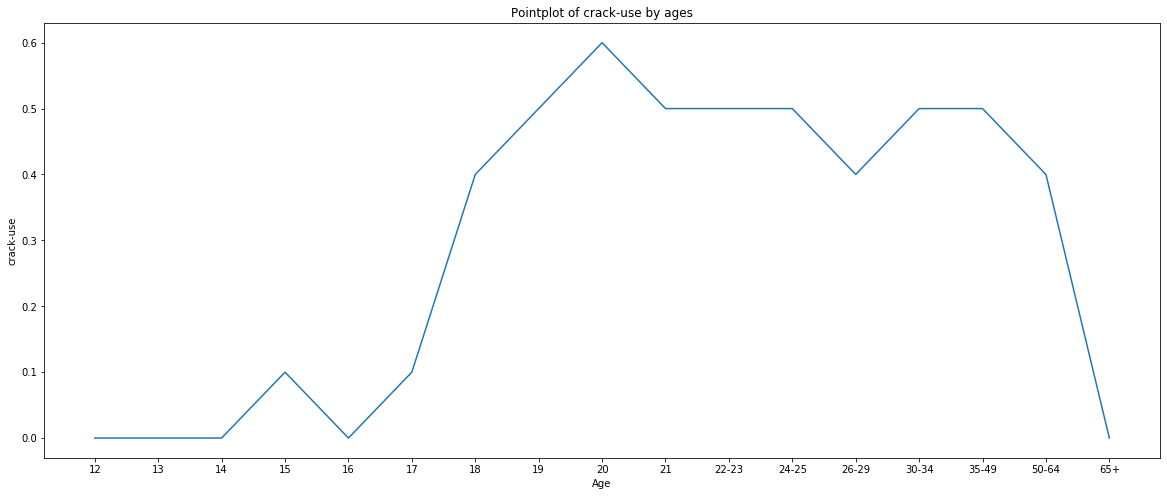

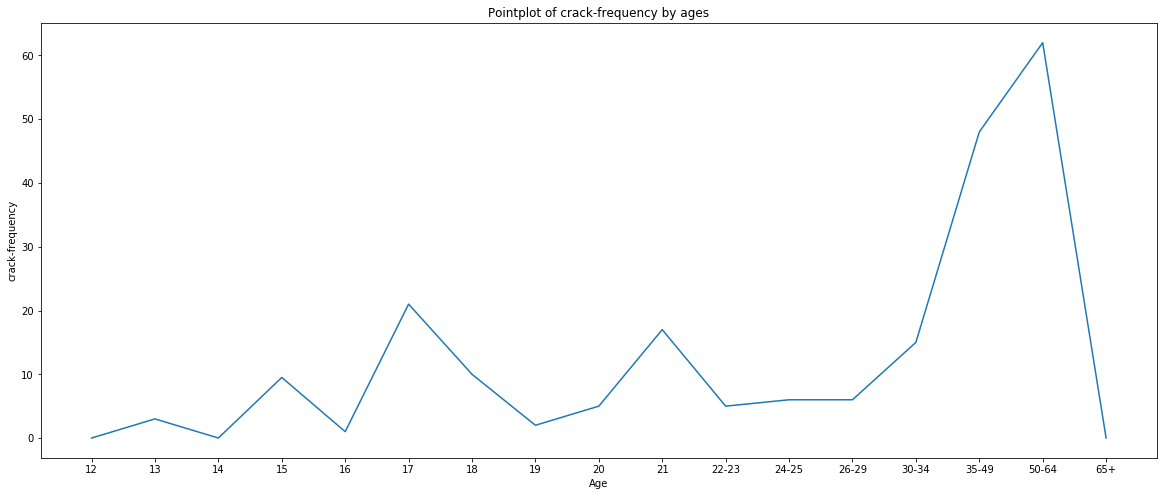

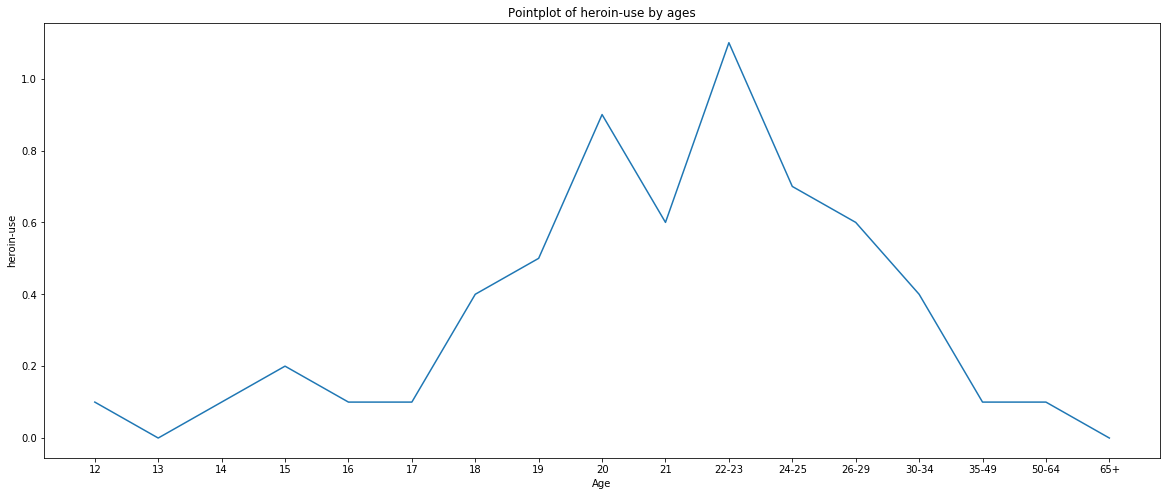

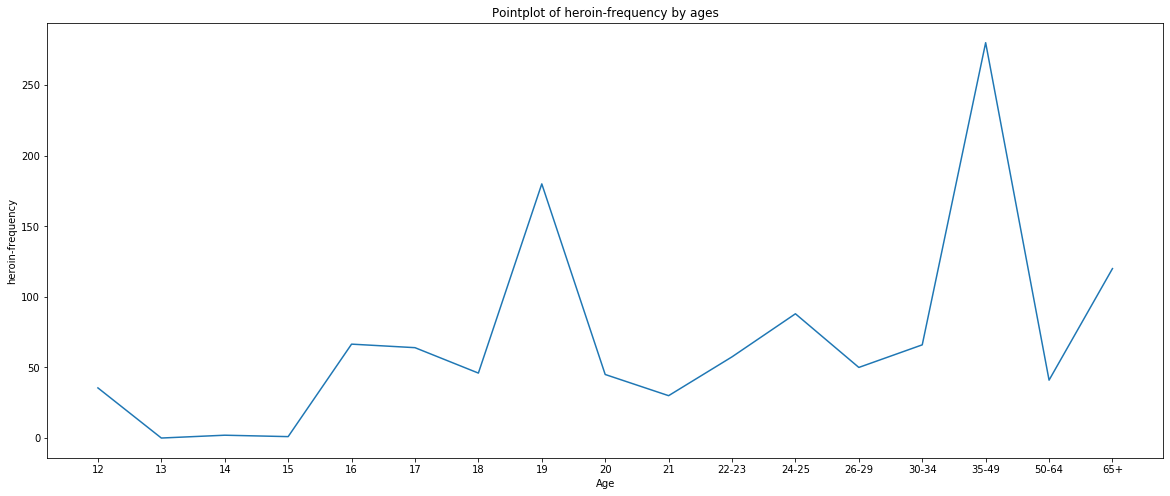

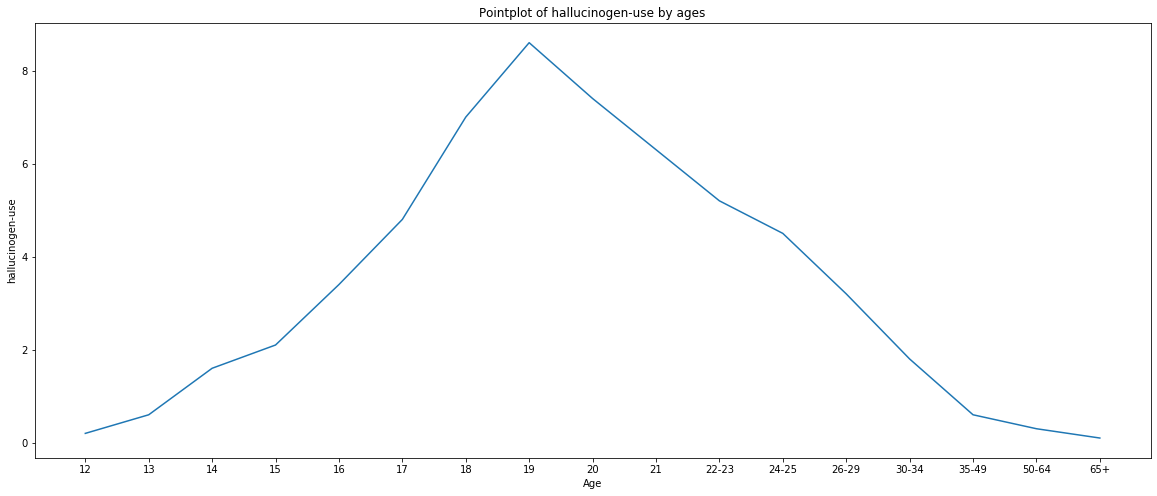

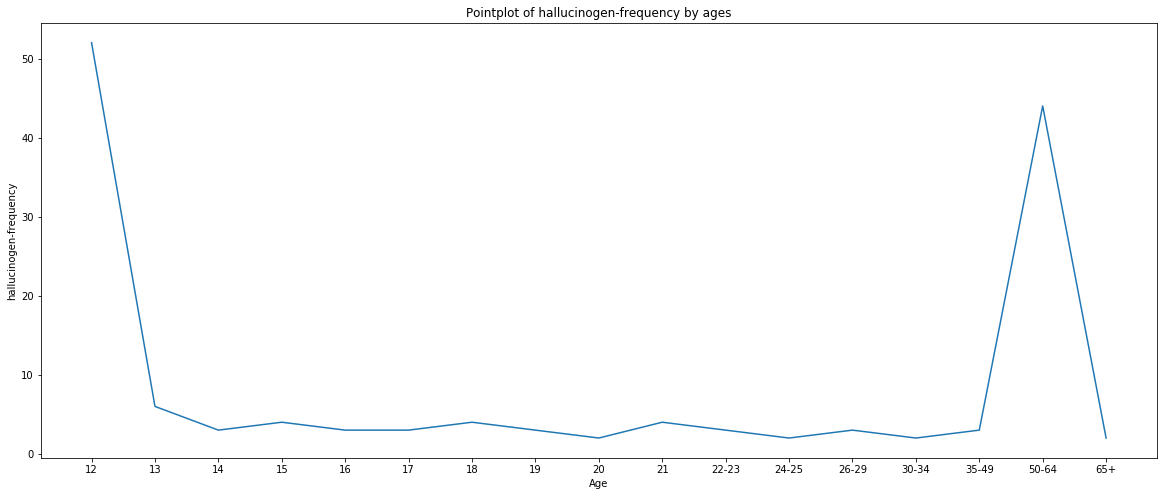

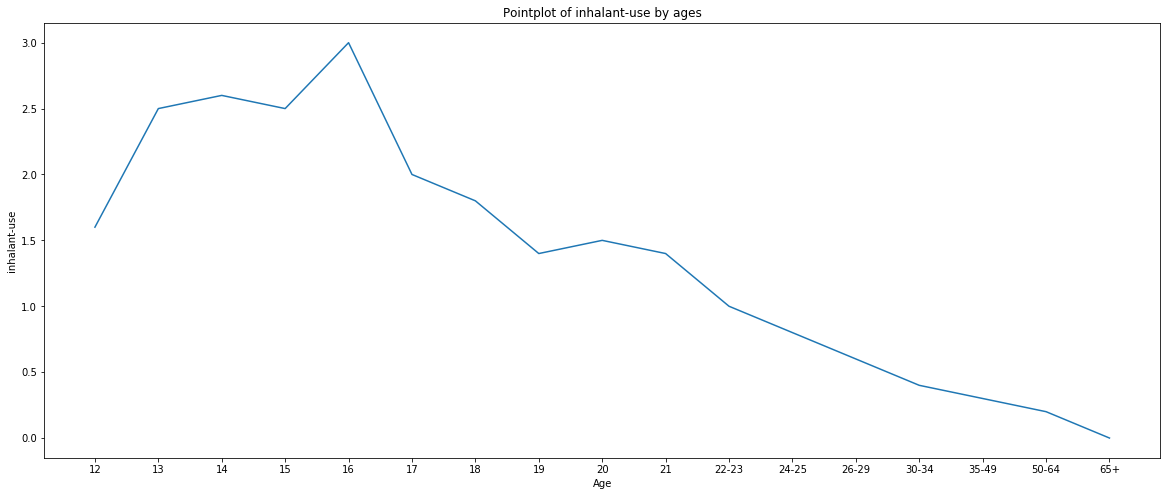

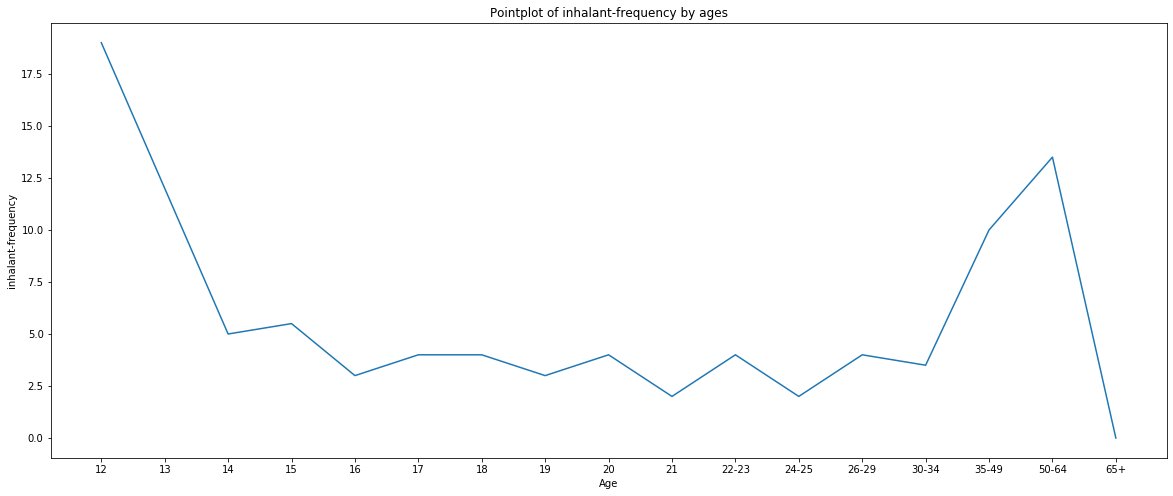

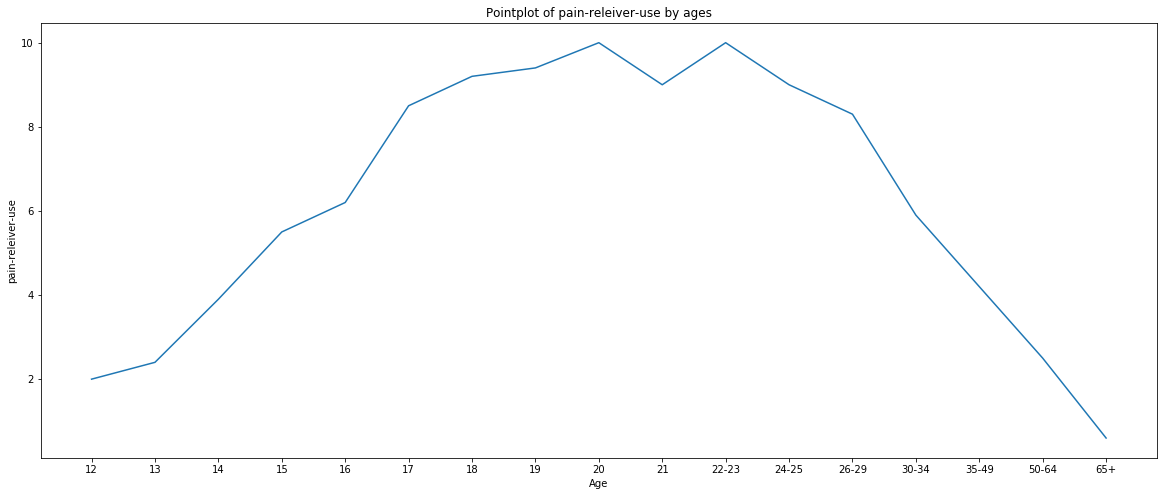

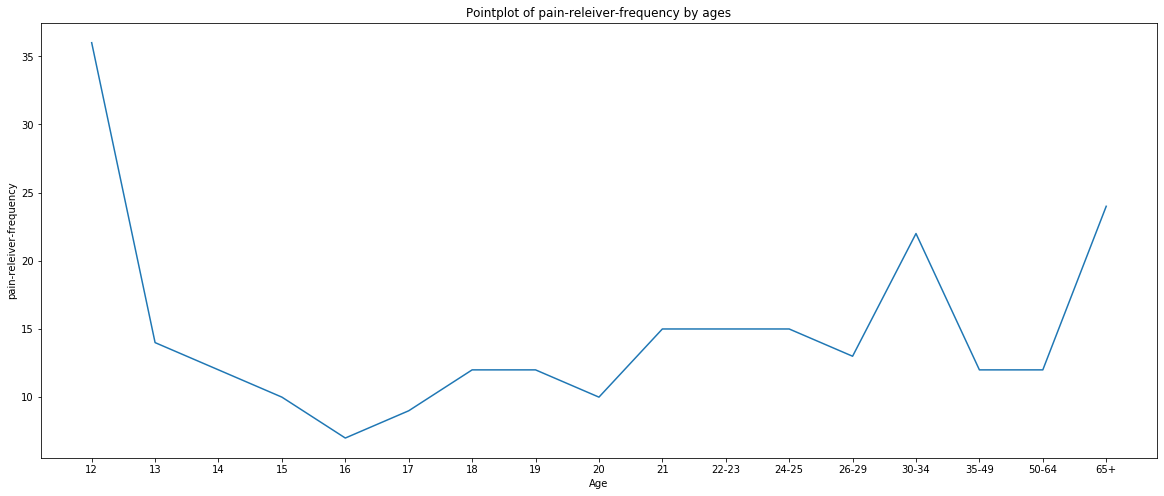

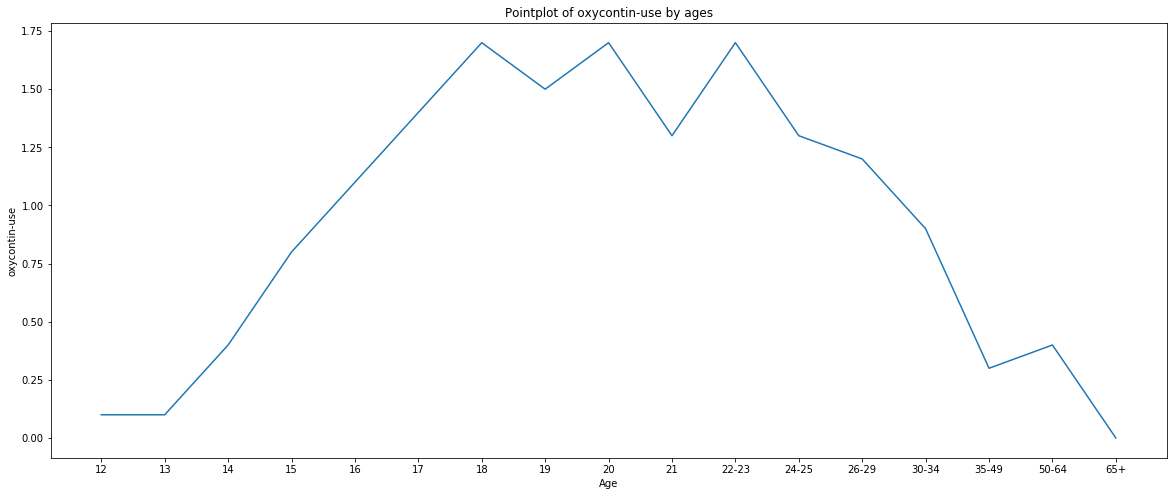

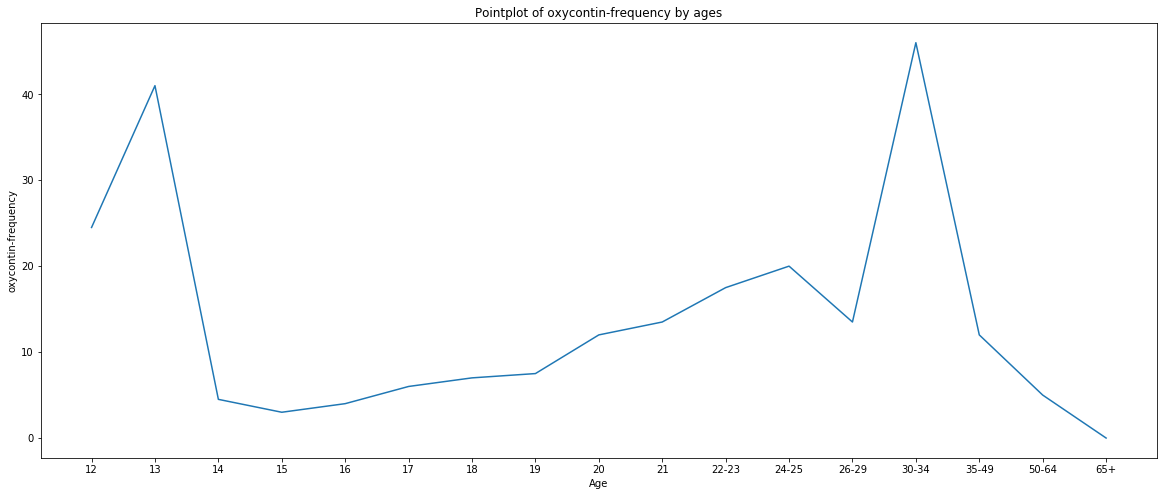

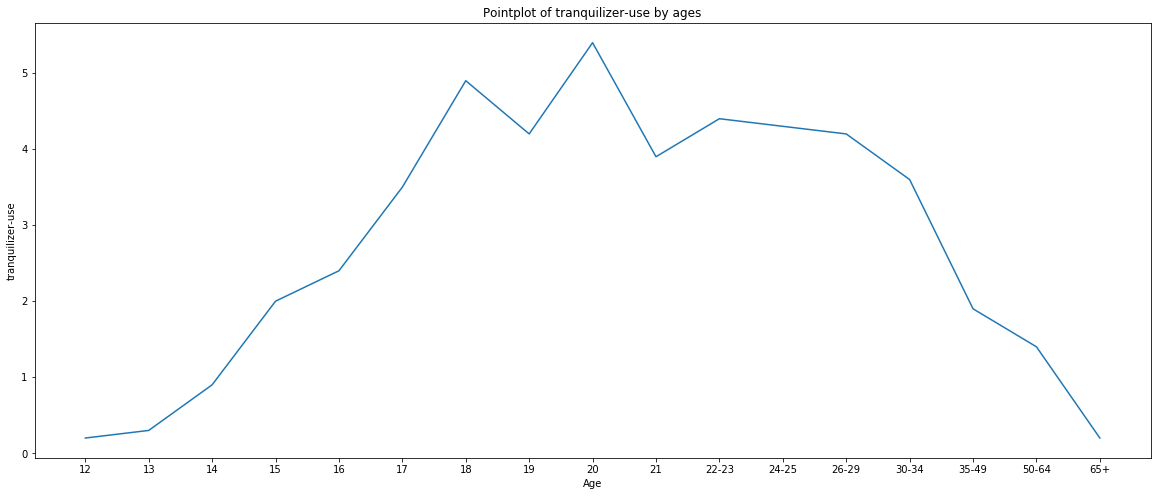

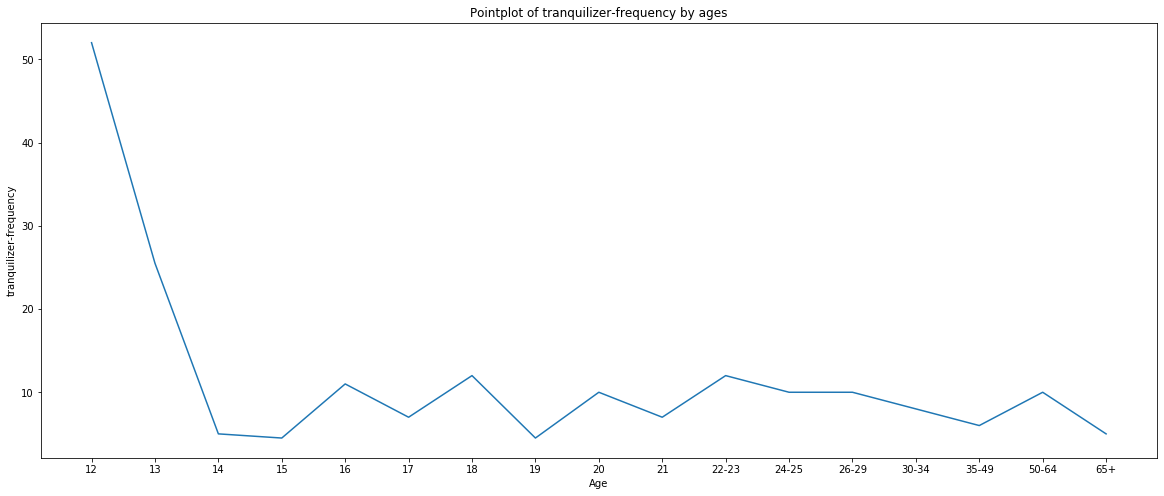

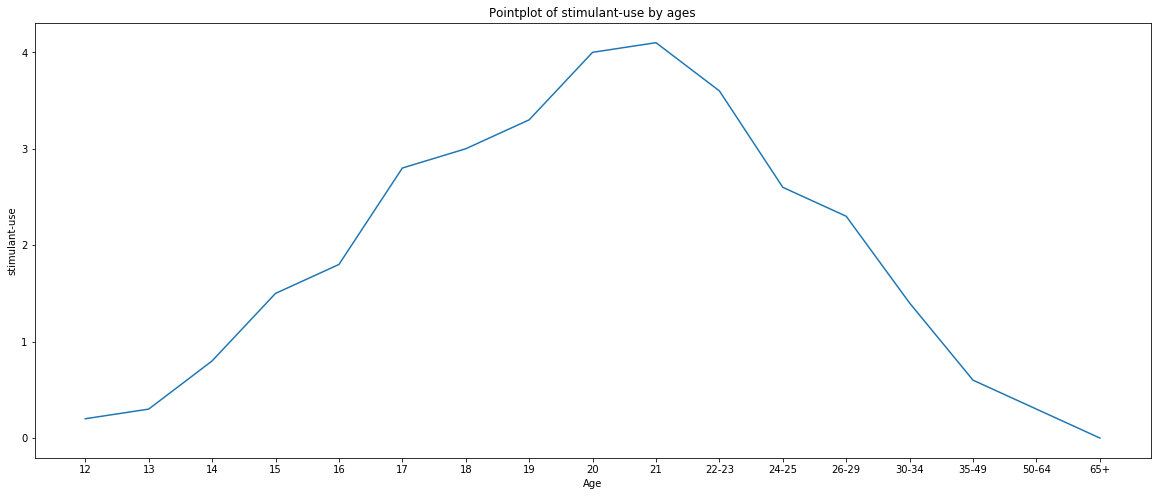

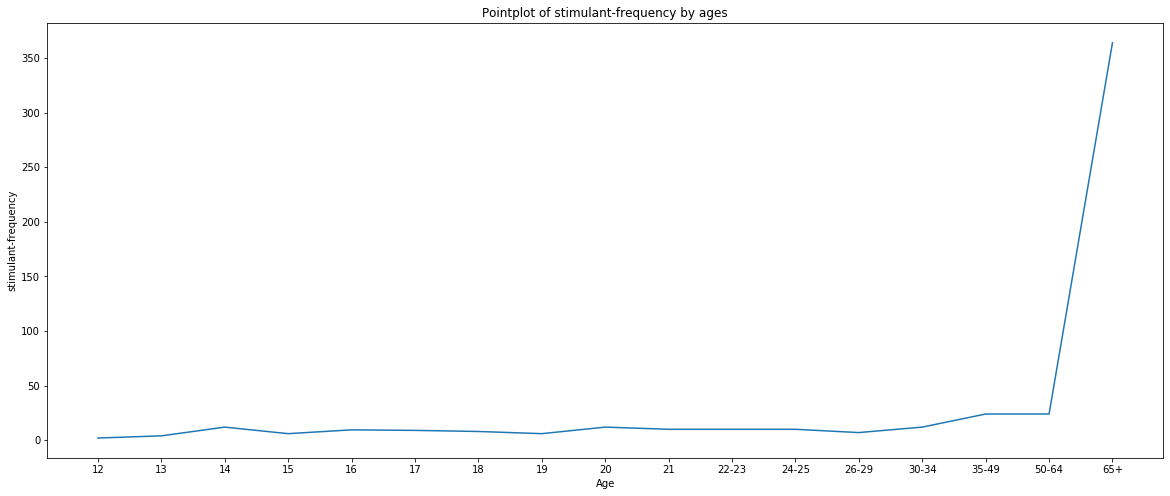

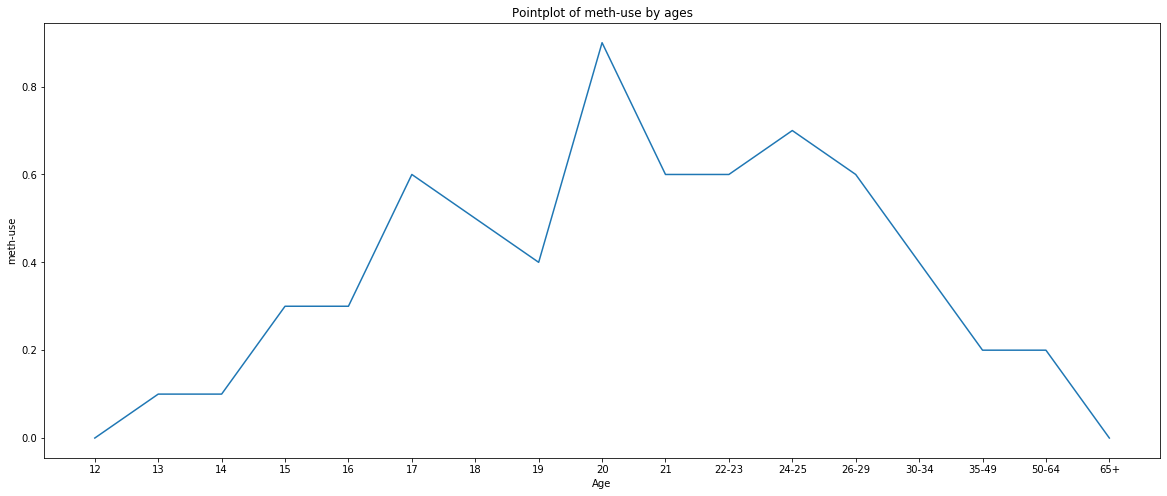

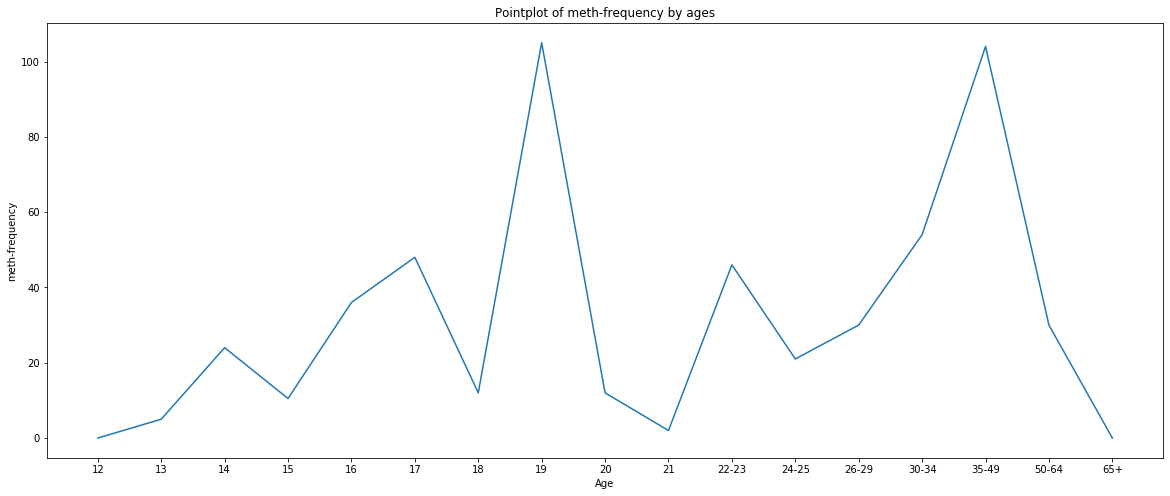

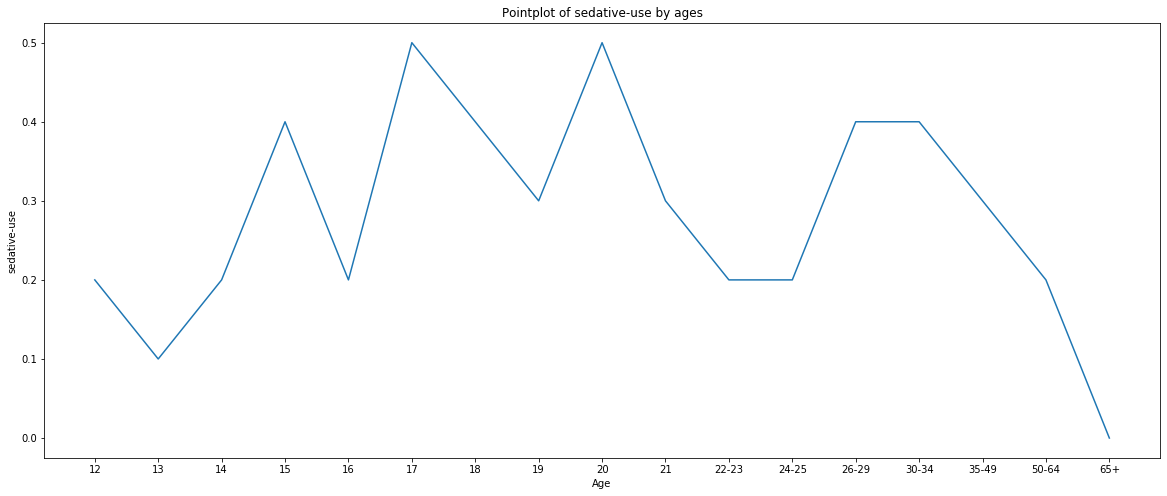

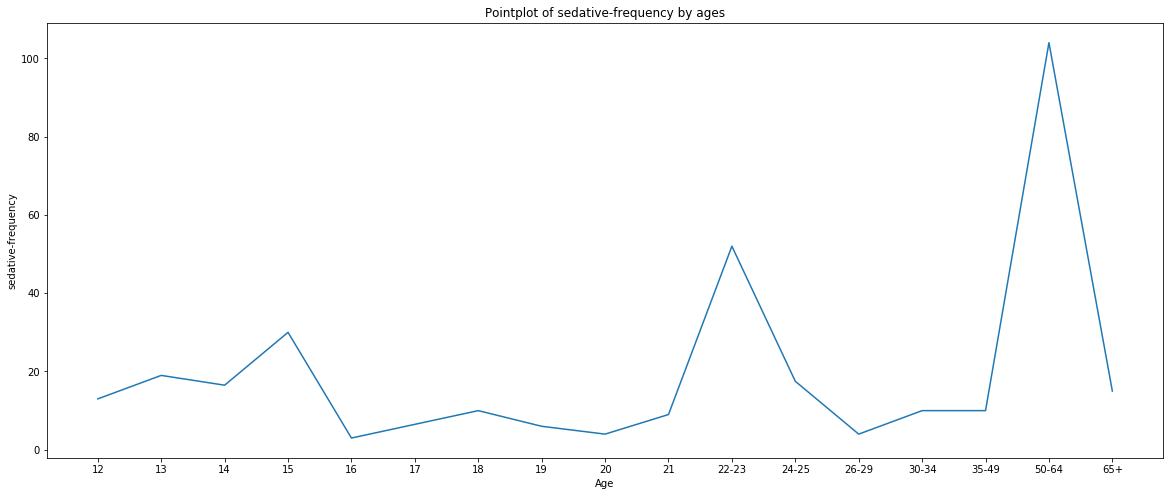

In [81]:
for i in df .columns:
    #sns.lvplot
    plt.figure(figsize = (20,8))
    plt.title('Pointplot of {0} by ages'.format(i))
    plt.ylabel('{0}'.format(i))
    plt.xlabel('Age')
    ax = sns.lineplot(x = data["age"].to_numpy(), y = '{0}'.format(i), data = df)
    